# CS-5824 / Advanced Machine Learning
# Assignment 1 Section B [ 40 Points ]

In this assignment, **you need to complete three sections** which are based on:

1. Logistic regression
2. MLE
3. Evaluation

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload **both** the PDF file and this notebook.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: amartya



# Section 0. Environment Set Up

In [237]:
!pip install scipy==1.1.0 Pillow==4.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount your google drive in google colab

In [238]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Append the directory to your python path using sys

In [239]:
import sys
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

Run some setup code for this notebook.

In [240]:
from __future__ import print_function
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Section 1. Logistic Regression [ 18 points ]

In this problem, we’ll apply logistic regression to a data set of spam email. 
This data consists of 4601 email messages, from which 57 features have been extracted. These are as follows:
- 48 features in [0, 100], giving the percentage of words in a given message which match a given
word on a list containing, e.g., “business”, “free”, etc.
- 6 features in [0, 100], giving the percentage of characters in the email that match characters on a
list containing, e.g., “$”, “#”, etc.
- Feature 55: The average length of an uninterrupted sequence of capital letters.
- Feature 56: The length of the longest uninterrupted sequence of capital letters.
- Feature 57: The sum of the lengths of uninterrupted sequences of capital letters.


There are files spam.train.dat and spam.test.dat (provided in the assignment files) in which
each row is an email. There are 3000 training and 1601 test examples. The final column in each file
indicates whether the email was spam.

The files can be loaded using the block of code below. You will answer the following questions using the data provided. 

In [241]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
train_path = prefix + customized_path_to_your_homework + 'data/spam.train.dat'
train_set = np.genfromtxt(train_path)
train_set

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 3.20e+01, 9.10e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 7.00e+00, 4.50e+01, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 3.00e+00, 7.00e+00, 0.00e+00],
       ...,
       [2.00e-01, 0.00e+00, 2.00e-01, ..., 6.30e+01, 5.45e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.80e+01, 1.07e+02, 1.00e+00],
       [0.00e+00, 0.00e+00, 5.60e-01, ..., 2.20e+01, 2.37e+02, 1.00e+00]])

In [242]:
#test_set
test_path = prefix + customized_path_to_your_homework + 'data/spam.test.dat'
test_set = np.genfromtxt(test_path)
test_set

array([[  0.  ,   0.  ,   0.  , ...,   5.  ,  17.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  34.  , 127.  ,   0.  ],
       [  1.19,   0.  ,   0.  , ...,  11.  ,  68.  ,   0.  ],
       ...,
       [  0.49,   0.49,   0.49, ...,  47.  , 281.  ,   1.  ],
       [  0.  ,   0.95,   0.95, ...,  45.  , 464.  ,   1.  ],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,   4.  ,   0.  ]])

In [243]:
#Splitting train and test into X and Y components

X_train = train_set[:,:-1]
Y_train = train_set[:,-1]

X_test = test_set[:,:-1]
Y_test = test_set[:,-1]

### Question 1. [ 3 points ]

Build a Logistic Regression model to classify whether an email is spam or not using the *spam* data set. Report your training and test performance.

In [244]:
#Build your model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none',max_iter= 100))
pipe.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [245]:
#Report training and test performance here

print("Training accuracy is: ", pipe.score(X_train, Y_train))
print("Test accuracy is: ",pipe.score(X_test, Y_test))

Training accuracy is:  0.9346666666666666
Test accuracy is:  0.920049968769519


### Question 2. [ 3 points ]

Plot the learning curve for this model. What is the Bias/Variance trade-off for this model ?

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


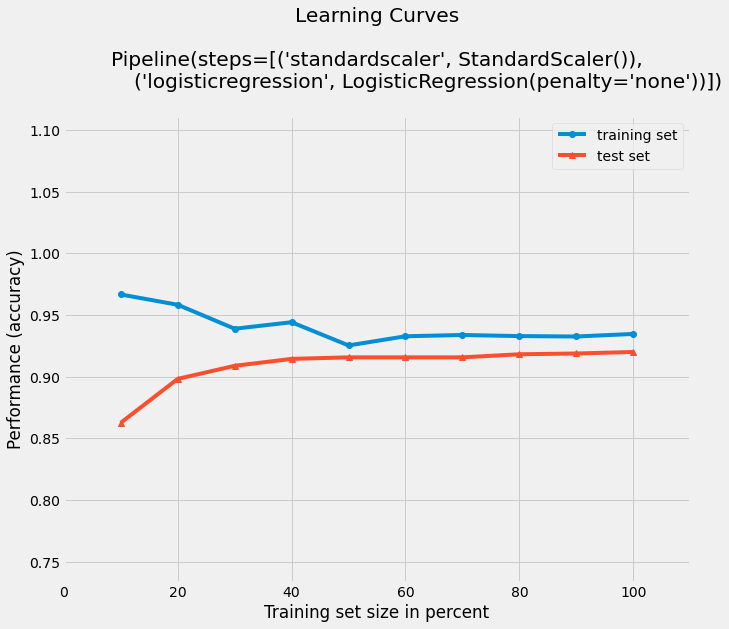

In [246]:
#Plot the learning curve

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, Y_train, X_test, Y_test, pipe,scoring ='accuracy',print_model ='False')
plt.show()

#### Comment on the Bias/Variance trade-off 
Ans: Initially the bias was low because the training accuracy was the highest while the variance was high. As the model learnt from more samples, the bias increased a bit while the variance decreased.

### Question 3. [ 3 points ]

Apply L2-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [247]:
#Apply L2-regularized logistic regression

l2r = LogisticRegression(penalty = 'l2',max_iter= 100)

In [248]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV

In [249]:
#Perform cross-validation 
parameter_list = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid1 = GridSearchCV(l2r,param_grid = parameter_list,cv=10 )

In [250]:
grid1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]})

In [251]:
#Best regularization penalty
grid1.best_params_

{'C': 0.5}

In [252]:
#Report your procedure and training and test performance
# A range of possible values for the regularization penalty was chosen which was added to the GridSearch Method which performed cross validation for each 
# penalty value and reported the best parameter value which gave the highest score among the folds. Below is the training and test score using the logistic regression model with 
# l2 regulariser with the best parameter value from the grid search method on train and test data 
print("Training accuracy is: ", grid1.best_estimator_.score(X_train, Y_train))
print("Test accuracy is: ",grid1.best_estimator_.score(X_test, Y_test))

Training accuracy is:  0.9236666666666666
Test accuracy is:  0.9188007495315428


### Question 4. [ 3 points ]

Apply L1-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [253]:
#Apply L1-regularized logistic regression

l1r = LogisticRegression(penalty = 'l1',max_iter= 100, solver='liblinear')

In [254]:
#Perform cross-validation 
parameter_list = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid2 = GridSearchCV(l1r,param_grid = parameter_list,cv=10 )

In [255]:
grid2.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]})

In [256]:
#Best regularization penalty
grid2.best_params_

{'C': 0.7}

In [257]:
#Report your procedure and training and test performance
# A range of possible values for the regularization penalty was chosen which was added to the GridSearch Method which performed cross validation for each 
# penalty value and reported the best parameter value which gave the highest score among the folds. Below is the training and test score using the logistic regression model with 
# l1 regulariser with the best parameter value from the grid search method on train and test data
print("Training accuracy is: ", grid2.best_estimator_.score(X_train, Y_train))
print("Test accuracy is: ", grid2.best_estimator_.score(X_test, Y_test))

Training accuracy is:  0.934
Test accuracy is:  0.9219237976264835


### Question 5. [ 3 points ]

What are the advantages and disadvantages of the two models with respect to this problem? For example, have there been a lot of sparseness in the model, or what kind of features have been removed?

In [258]:
# Advantages and disadvantages of the two models 

L1 regularizer punishes certain features by making them 0 thus making the feature space sparse. While L2 regulariser doesn't zero out the features but promotes the outlier features more. 

### Question 6. [3 points]

Transform the features with the basis function of your choice. Retrain the two models above and report the model performances. Why did you choose this basis function ?

In [259]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [260]:
transformed_data_train = []
transformed_data_test = []

for data_train in X_train:
  transformed_data_train.append(sigmoid(data_train))

for data_test in X_test:
  transformed_data_test.append(sigmoid(data_test))

In [261]:
#Retrain the two models above 
l1r.fit(transformed_data_train, Y_train)

l2r.fit(transformed_data_train, Y_train)

LogisticRegression()

In [262]:
#Report the model performances
print("Train accuracy:", l1r.score( transformed_data_train, Y_train))
print("Test accuracy:", l1r.score( transformed_data_test, Y_test))

Train accuracy: 0.9416666666666667
Test accuracy: 0.929419113054341


In [263]:
#Report the model performances
print("Train accuracy:", l2r.score( transformed_data_train, Y_train))
print("Test accuracy:", l2r.score( transformed_data_test, Y_test))

Train accuracy: 0.931
Test accuracy: 0.9237976264834479


In [264]:
#Why choosing this basis function?

Sigmoid function was chosen over others because it converts the feature space to a range of 0 and 1 and the target values are also either 0 or 1. Thus, convertiung the feature space using the sigmoid function gives the best accuracy score

# Section 2. MLE [15 pts]

For the following problems, we will a collaborative filtering data set. These data
are originally from http://eigentaste.berkeley.edu/dataset/, however, they have been altered somewhat for this HW, so you should use the files directly shared from us. These problems will only examine the marginal distribution of the ratings themselves. Assuming that the data set is in your homework path on google drive, the ratings can be loaded into your collab session using the block of code in the next cell. This will give you a 1761439 × 3 matrix of doubles. Right now we only care about the ratings, which are the third column. You’ll be asked to produce figures. Include these figures in your notebook.

In [265]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
data_path = prefix + customized_path_to_your_homework + 'data/jester_ratings.dat'
data = np.genfromtxt(data_path)
data

array([[ 1.000000e+00,  5.000000e+00,  2.275770e-01],
       [ 1.000000e+00,  7.000000e+00, -9.279702e+00],
       [ 1.000000e+00,  8.000000e+00, -9.267760e+00],
       ...,
       [ 6.397800e+04,  1.240000e+02, -9.022733e+00],
       [ 6.397800e+04,  5.800000e+01, -8.644745e+00],
       [ 6.397800e+04,  4.400000e+01, -8.445059e+00]])

### Question 1. [ 5 points ]

Generate a set of normalized histograms (histograms which have an area of one) of the ratings and
qualitatively describe the empirical distributions that you see. Try several different bin sizes and explain your choices. Are the resulting density estimates uni- or multi-modal? Where do the peaks
appear to be? Do these answers change as you vary the number of bins?

In [266]:
#ratings 
ratings = data[:,2]

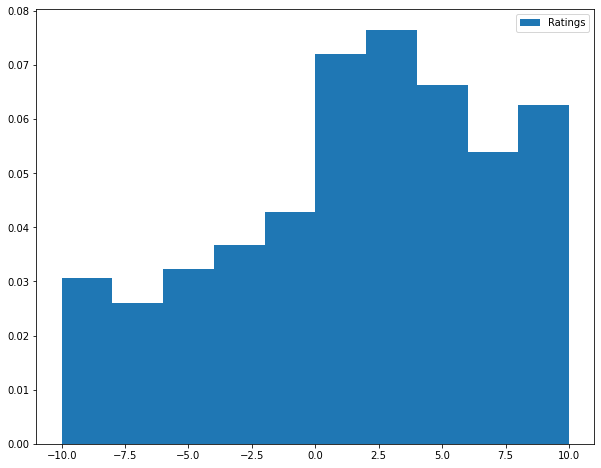

In [267]:
# Your answer here (code, histogram, response to questions)
plt.hist(ratings, density = True, label = "Ratings")
plt.legend()
plt.show()

From the above histogram with a default no of bins as 10, it can be seen that the normalised frequency is highest for ratings in the range of ~ 1.75 to 2.75. There are peaks around the rating values of -10 to -7 and 8 to 10. While the least normalised frequency of ratings is that in the range of -7 to ~ -5.5. 

In [268]:
#size of bin = ((max.value - min.vale) / total bins), hence varying the number of bins will allow us to change the size of bins

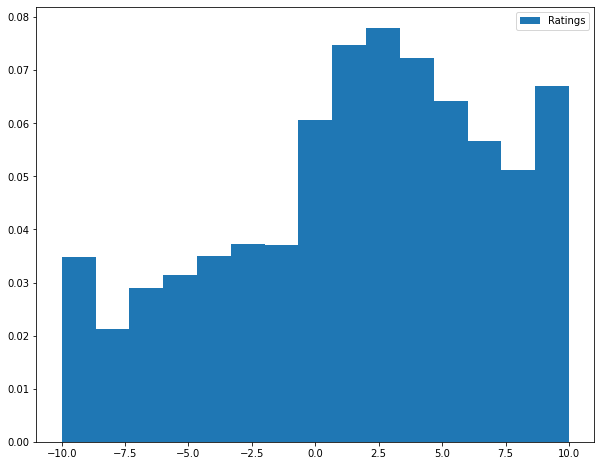

In [269]:
plt.hist(ratings, density = True, label = "Ratings", bins=15)
plt.legend()
plt.show()

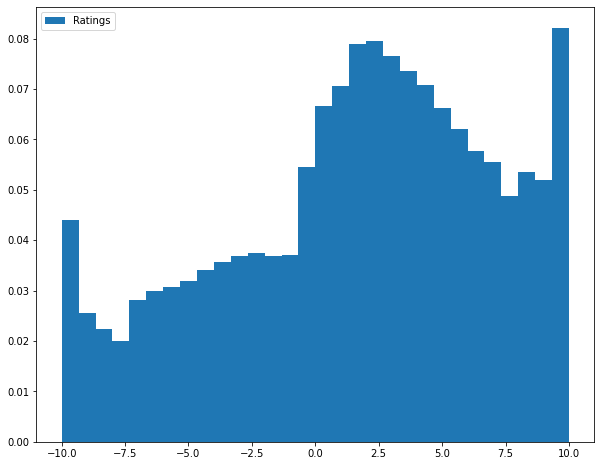

In [270]:
plt.hist(ratings, density = True, label = "Ratings", bins=30)
plt.legend()
plt.show()

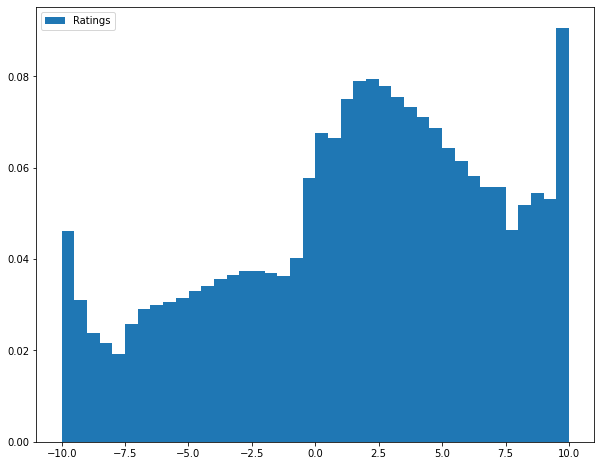

In [271]:
plt.hist(ratings, density = True, label = "Ratings", bins=40)
plt.legend()
plt.show()

Varying the bin sizes shows how different bin sizes can show different representations. When no of bins = 15. The highest frequency was in the rating range of 1.75 to 2.5. However, when the bin count was increased to 30 and 40, it is observed that the normalised frequency is highest for rating count in the range of 9 to 10.

The resulting distribution is multimodal since it has multiple peaks. These peaks appear to be approximately at rating values of -10, -3, 0.5, 2, 8 and 9.5.However, while normalised frequency value changes with the number of bins but the location of the peak doesn't which makes sense because the frequency per bin changes uniformly with the width of the bin with respect to the rating values thus retaining the shape of the plot.

### Question 2. [ 5 points ]

Perform a maximum-likelihood fit of a Gaussian distribution to the ratings and report the mean and
variance. Overlay the MLE Gaussian fit on top of the normalized histogram. Is it a good fit or a bad fit
and why?



In [272]:
# Fit MLE model
from scipy import stats
import numpy as np
pdf = stats.norm.pdf
mu, sigma = stats.norm.fit(ratings)

In [273]:
# Report mean and variance
print("Mean of MLE fit is:",mu)
print("Std Deviation of MLE fit is:",sigma)

Mean of MLE fit is: 1.618578798261535
Std Deviation of MLE fit is: 5.3025592210725545


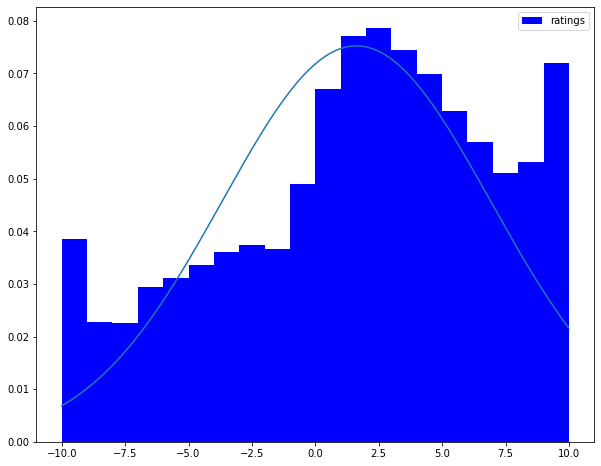

In [274]:
# Overlay two histograms
x = np.linspace(-10,10,1000,endpoint=True)
y = pdf(x,loc=mu,scale=sigma)

fig,ax = plt.subplots()
plt.plot(x,y)

ax.hist(ratings, label="ratings", color = 'blue', density = True, bins = 20)

plt.legend()
plt.show()

In [275]:
# Explain model fit

Upon mle fitting and plotting it alongside the original distribution, it can be seen that the rating data is somewhat Gaussian with a central mean with certain skewness towards the edges. 

### Question 3. [ 5 points ]

Randomly partition the data into ten disjoint sets (called folds) of approximately the same size. We will use these partitions to assess the generalization performance of these MLE fits. This is done by creating ten experiments where one fold is taken to be a “test” set and the remaining nine are together considered to be the “training” set. A model is fit on the training data and asked to make predictions of the test set. For a given model, this produces ten log probability numbers that reflect how well the model generalized to the unseen data. If the folds are of different size, the predictive log probabilities can be turned into “averages” by dividing the overall logprob by the number of test cases. Perform this procedure for your Gaussian histogram density estimators from Problem 1 and 2. That is, fit this model ten times on 9/10ths of the data and ask it to make predictions of the remaining 1/10th. To visualize the results, produce a boxplot of the average log probabilities.

In [276]:
from sklearn.model_selection import KFold

In [277]:
# Perform 10-fold cross validation
cv = KFold(n_splits=10, random_state=22, shuffle=True)
test_score = []

for index, (train_index, val_index) in enumerate(cv.split(ratings)):
  mu2, sigma2 = stats.norm.fit(ratings[train_index])
  res = stats.norm.logpdf(ratings[val_index], loc=mu2, scale=sigma2)
  test_score.append(np.mean(res))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5409b5750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe540979210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5409b5210>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe540979cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe540997290>],
 'means': []}

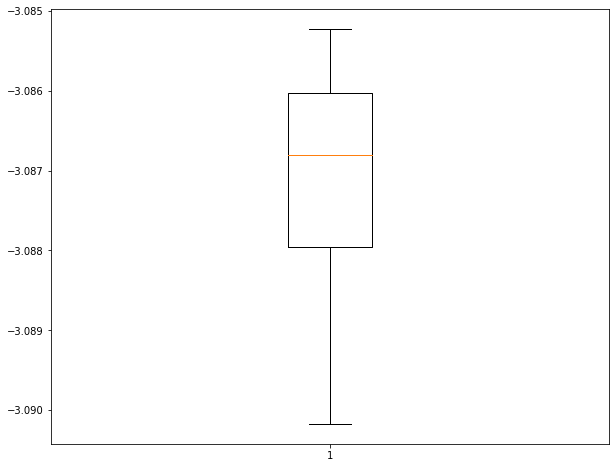

In [278]:
# Visualize results
plt.boxplot(test_score)

## Section 3. Evaluation Questions  [7 points ]

1. Suppose we fit a linear model to a polynomial data. Is this model a good fit? If not, is it underfitting or overfitting? [ 2 points ]

 Ans: If we fit a linear model to a polynomial data, it will be a bad fit because the model will be unable to replicate the polynomial behaviour of the data and thus being unable to do so, it will result in an underfitting.


2.  How does cross validation address the problem of overfitting? Does it only identify (or detect) overfitting? Does it also eliminate (or at least reduce) overfitting? Explain
your answers. [2.5 points ]

 Ans: Cross validation splits the available training into k folds and then trains on the k-1 while tests on the kth fold using it as a validation set. Hence, if the performance on the training set is good but is bad on the valdiation, it shows that the model is overfitting. Whereas, if the performance on the training as well the validation sets are good it reports that the model has been performing good. Thus, cross-validation helps in preventing the problem of overfitting by training the model part by part on a portion of the training data.

3. Suppose you are given a dataset { (𝑥<sub>1</sub>, 𝑦<sub>1</sub>), (𝑥<sub>2</sub>, 𝑦<sub>2</sub>), ⋯ , (𝑥<sub>m</sub>, 𝑦<sub>m</sub>) } and you are asked to perform **5-fold cross-validation** for selecting the value of 𝜆 for $𝐿_2$ regularization for a regularized linear regression. Please describe the procedure of how you would select the value 𝜆. [2.5 points ]
 
 Ans: A 5 fold cross validation will split the training data into 5 equal splits where 4 splits will be used for training and 1 split for validation during training. This will be repeated 5 times for different combinations of train and test split. A possible list of Lambda values are chosen and then the cross validation process is repeated for all such values reporting the avg. accuracy score for each lambda across all splits. At the end of it all, the lamda value with best avg. accuracy is reported 

In [279]:
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc 
!pip install --quiet pypandoc

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 123934 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2_all.deb ...
Unpacking fonts-lato (2.0-2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.09_all.deb ...
Unpacking tex-common (6.09) ...
Selecting previously unselected package fonts-lmodern.
Preparing to unpack .../04-fonts-lmodern_2.004.5-3_all.deb ...
Unpacking fonts-lmodern (2.004.5-3) ...
Selecting previously unselected package fonts-noto-mono.
Preparing to unpack .

In [281]:
!jupyter nbconvert --to PDF "/content/gdrive/MyDrive/Colab Notebooks/AmartyaDuttaSectionB.ipynb"

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/AmartyaDuttaSectionB.ipynb to PDF
[NbConvertApp] Support files will be in AmartyaDuttaSectionB_files/
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Making directory ./AmartyaDuttaSectionB_files
[NbConvertApp] Writing 151526 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 221420 bytes to /c